In [1]:
import obspy
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import util
from scipy.fft import fft, ifft, fftfreq, rfft
import pickle
from obspy import UTCDateTime
import scipy.signal as signal

In [12]:
# root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'
root = '/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/other/data/2019_01_01/'

In [205]:
%%script false --no-raise-error
eq_list = os.listdir(root)

client = Client("IRIS")

cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [146]:
# cat_with_data[0:2]

2 Event(s) in Catalog:
2019-01-31T19:49:49.660000Z | -20.486,  -69.016 | 4.2 mb
2019-01-31T13:09:53.370000Z |  +8.978,  -83.758 | 4.9 Mwr

In [167]:
os.listdir(root)

['20190101_154104.a',
 '.DS_Store',
 '20190101_111252.a',
 '20190101_174827.a',
 '20190101_143138.a',
 '20190101_103117.a',
 '20190101_061820.a',
 '20190101_123816.a',
 '20190101_123257.a',
 '20190101_061545.a',
 '20190101_000405.a',
 '20190101_195532.a',
 '20190131_194949.a',
 '20190101_183747.a',
 '20190101_133741.a',
 '20190101_020936.a',
 '20190101_010315.a',
 '20190101_030330.a',
 '20190101_220539.a',
 '20190101_114005.a']

In [172]:
for eq_name in eq_with_data:
    try:
        with open(root+eq_name+'/picks.pkl', 'rb') as f:
            picks = pickle.load(f)
        print(eq_name + "successful")
        print(len(picks))
    except:
        print(eq_name + 'failed')
        

20190101_154104.asuccessful
0
.DS_Storefailed
20190101_111252.asuccessful
0
20190101_174827.asuccessful
12
20190101_143138.asuccessful
5
20190101_103117.asuccessful
2
20190101_061820.asuccessful
7
20190101_123816.asuccessful
5
20190101_123257.asuccessful
2
20190101_061545.asuccessful
5
20190101_000405.asuccessful
1
20190101_195532.asuccessful
1
20190131_194949.asuccessful
3
20190101_183747.asuccessful
22
20190101_133741.asuccessful
10
20190101_020936.asuccessful
3
20190101_010315.asuccessful
3
20190101_030330.asuccessful
11
20190101_220539.asuccessful
0
20190101_114005.asuccessful
6


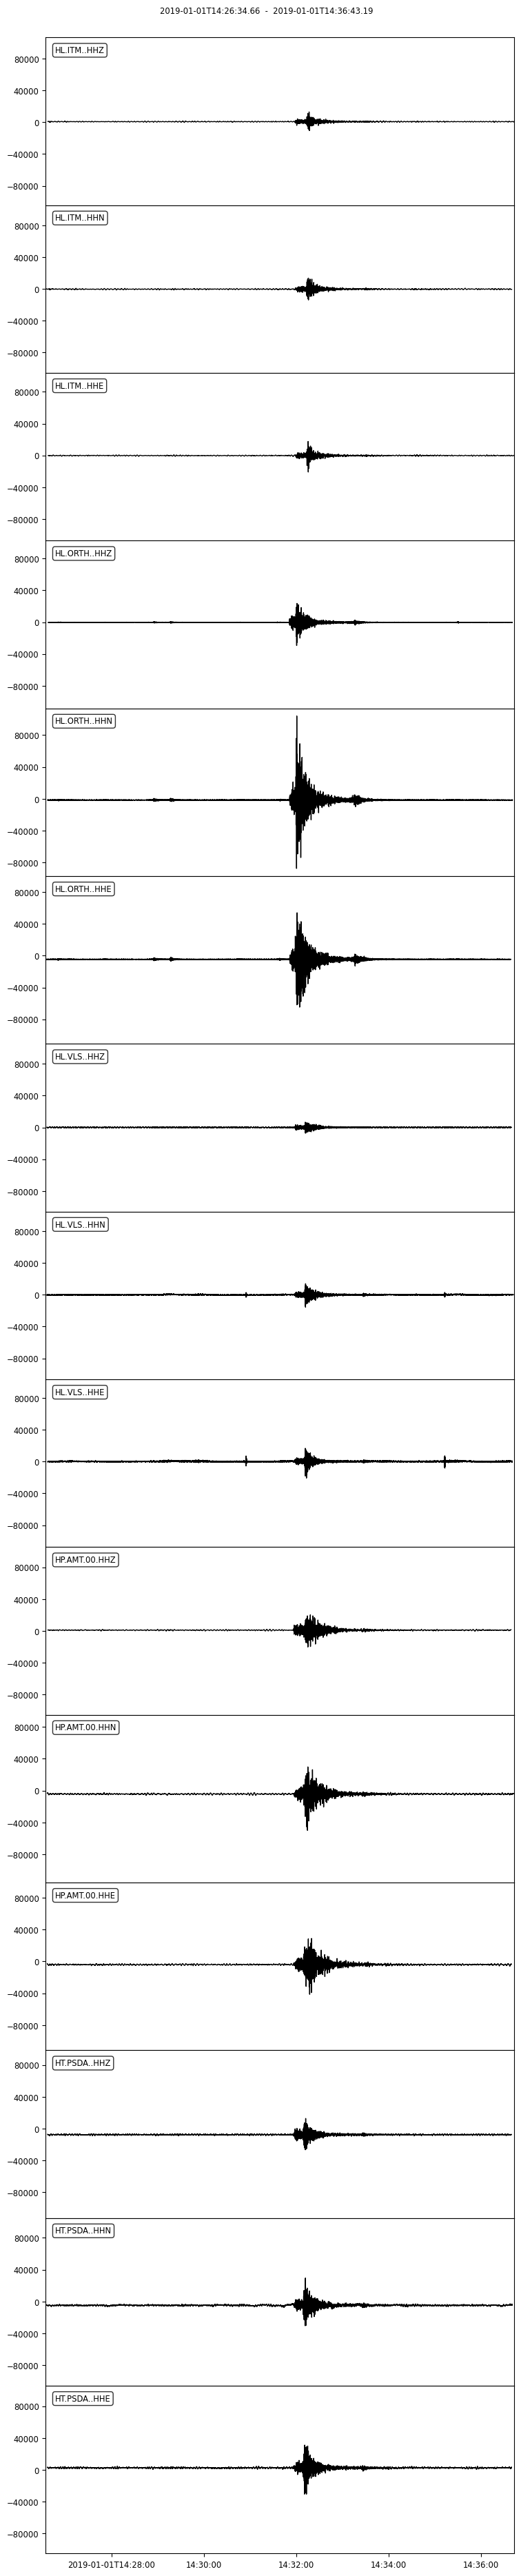

15 Trace(s) in Stream:
HP.AMT.00.HHE | 2019-01-01T14:26:36.780000Z - 2019-01-01T14:36:39.230000Z | 100.0 Hz, 60246 samples
HP.AMT.00.HHN | 2019-01-01T14:26:36.750000Z - 2019-01-01T14:36:42.590000Z | 100.0 Hz, 60585 samples
HP.AMT.00.HHZ | 2019-01-01T14:26:37.510000Z - 2019-01-01T14:36:38.900000Z | 100.0 Hz, 60140 samples
HL.ITM..HHE   | 2019-01-01T14:26:37.900000Z - 2019-01-01T14:36:43.190000Z | 100.0 Hz, 60530 samples
HL.ITM..HHN   | 2019-01-01T14:26:34.660000Z - 2019-01-01T14:36:39.700000Z | 100.0 Hz, 60505 samples
HL.ITM..HHZ   | 2019-01-01T14:26:37.470000Z - 2019-01-01T14:36:43.030000Z | 100.0 Hz, 60557 samples
HL.ORTH..HHE  | 2019-01-01T14:26:35.465000Z - 2019-01-01T14:36:38.585000Z | 100.0 Hz, 60313 samples
HL.ORTH..HHN  | 2019-01-01T14:26:37.205000Z - 2019-01-01T14:36:40.805000Z | 100.0 Hz, 60361 samples
HL.ORTH..HHZ  | 2019-01-01T14:26:38.024999Z - 2019-01-01T14:36:40.404999Z | 100.0 Hz, 60239 samples
HT.PSDA..HHE  | 2019-01-01T14:26:36.915000Z - 2019-01-01T14:36:39.525000Z | 1

In [234]:
eq_with_data = os.listdir('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/other/data/2019_01_01/')
eq_name = eq_with_data[4]
data = obspy.read(root+eq_name+'/data/*/*')
data.plot()
inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
data.remove_response(inv)
# data.plot()

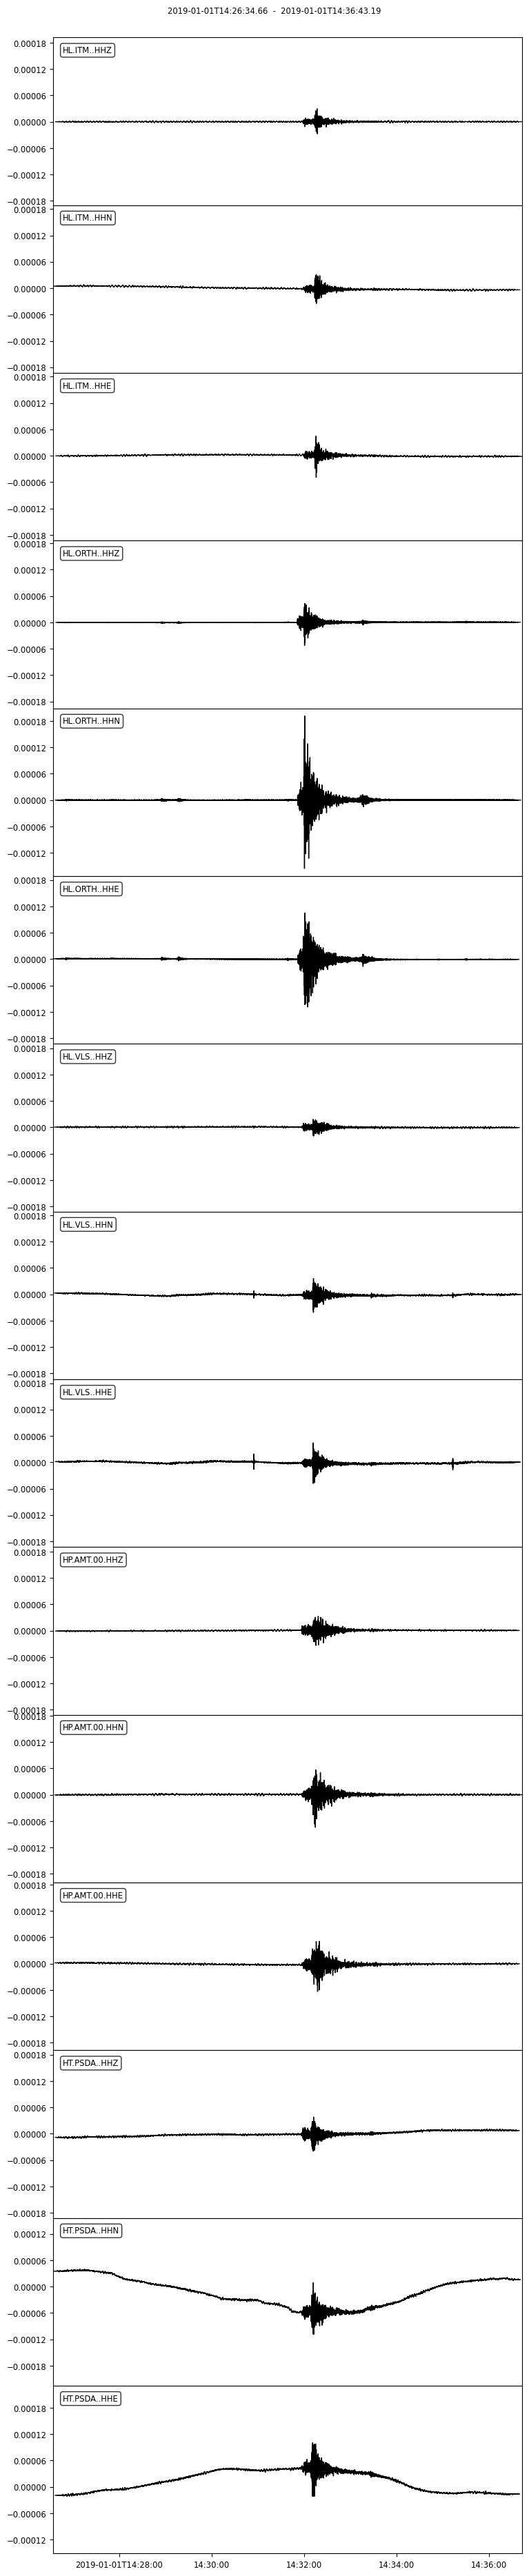

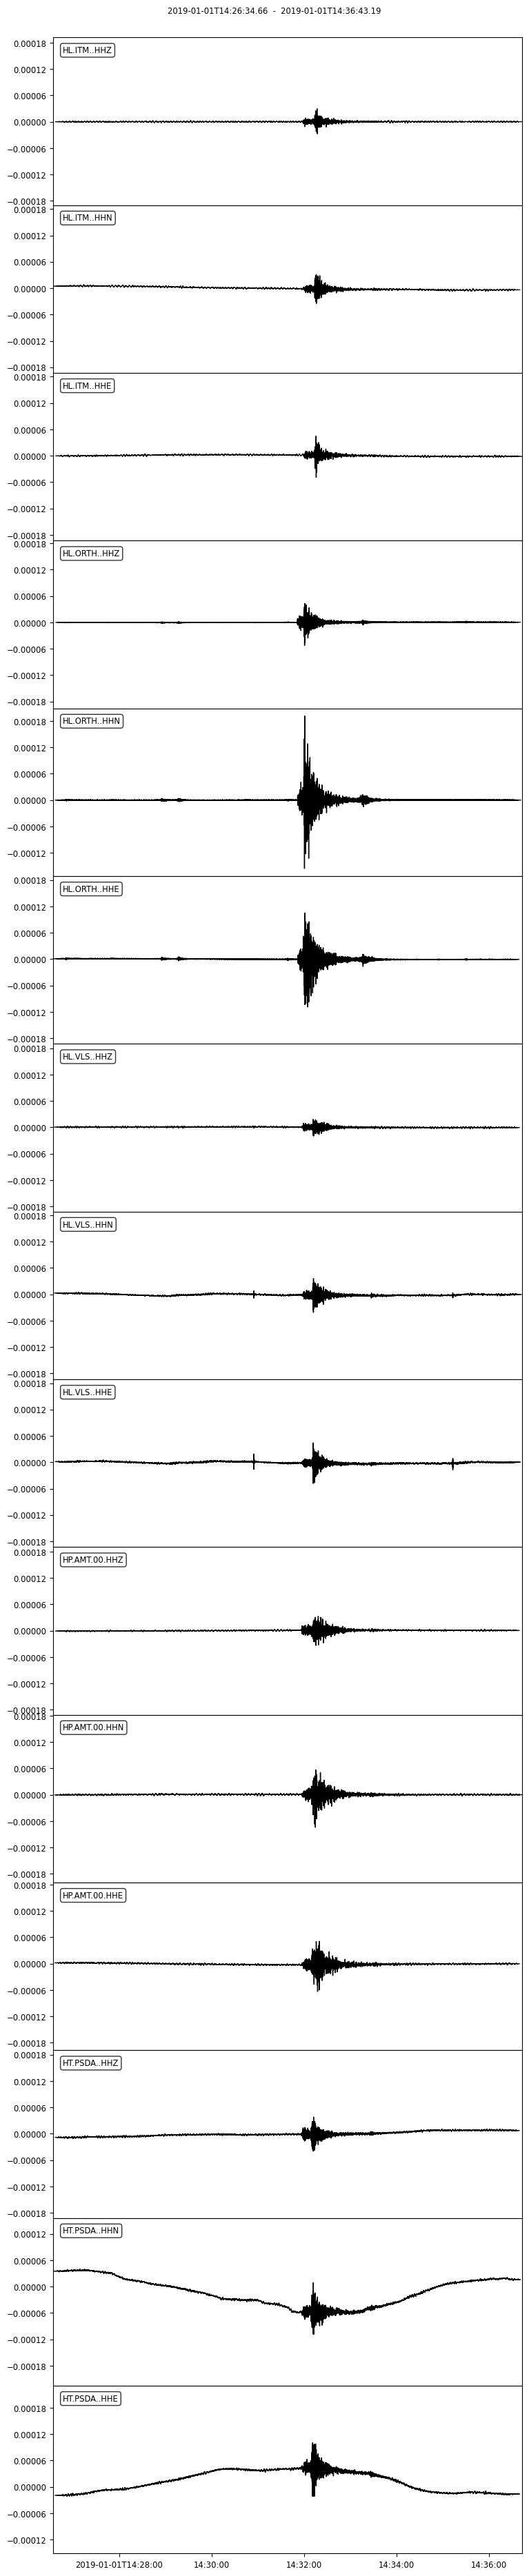

In [235]:
inv
tr_no = 0
data.plot()

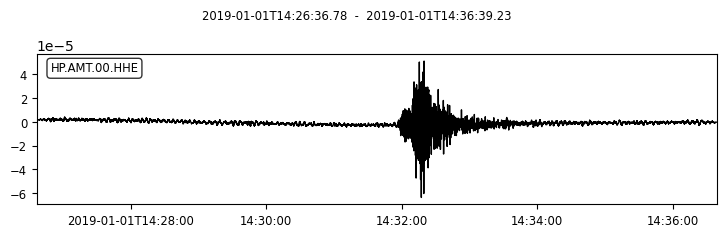

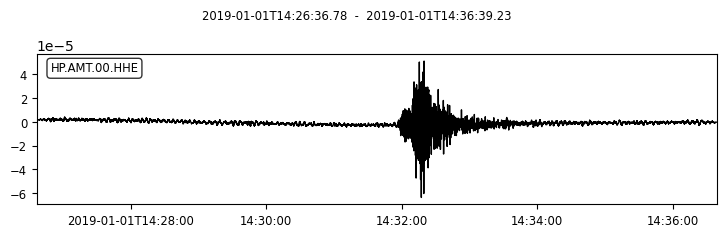

In [236]:
with open(root+eq_name+'/picks.pkl', 'rb') as f:
    picks = pickle.load(f)
sr = data[tr_no].stats.sampling_rate
tr_name = data[tr_no].stats.network+'.'+data[tr_no].stats.station+'.'+data[tr_no].stats.location
pick = UTCDateTime(picks[tr_name])
start = int((pick - data[tr_no].stats.starttime)*sr)
end = int(start + 4 * sr)
s = data[tr_no].copy()#.filter('lowpass', freq=3)
s.plot()

detrend

31920

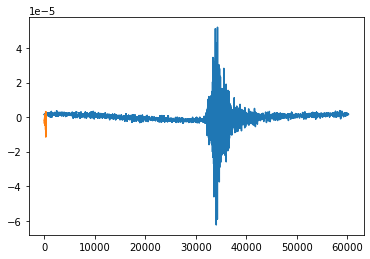

In [237]:
coda = signal.detrend(s)
plt.plot(coda)
coda = s[start:end]
plt.plot(coda)
start

taper and pad with zeros

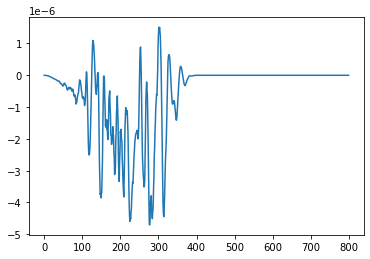

In [238]:
nx      = len(coda)
hann    = np.hanning(nx) #Is this the right sort of filter?
nx2     = 2*nx
x       = np.zeros(nx2)

x[0:nx] = coda*hann
plt.plot(x)

smooth

In [239]:
s.stats

         network: HP
         station: AMT
        location: 00
         channel: HHE
       starttime: 2019-01-01T14:26:36.780000Z
         endtime: 2019-01-01T14:36:39.230000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 60246
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 142, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 72704})
      processing: ["ObsPy 1.2.2: remove_response(fig=None::inventory=<obspy.core.inventory.inventory.Inventory object at 0x7ff47393f940>::output='VEL'::plot=False::pre_filt=None::taper=True::taper_fraction=0.05::water_level=60::zero_mean=True)"]

(0.01, 55)

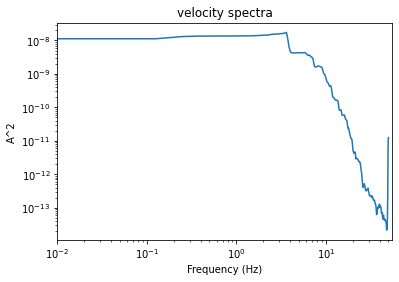

In [240]:
#%matplotlib widget
ft_x  = scipy.fft.fft(x,nx2)
Pxx   = abs(ft_x)**2
dt = s.stats.delta

Pfreq  = scipy.fft.rfftfreq(nx2,dt)#getting the frequencies to plot on the xaxis 
Pnf    = len(Pfreq)

nsmooth = 30
Pxx_smooth = np.convolve(Pxx, np.ones(nsmooth)/nsmooth)
#Because of the variance of spectral estimates, smoothing is necesary. We do this using a running window convolution. 
#It is a rough way to do it, you can choose better ways.



plt.loglog(Pfreq,Pxx_smooth[0:Pnf])
plt.xlabel('Frequency (Hz)');
plt.ylabel('A^2');
plt.title('velocity spectra');
plt.xlim(dt, 55)

(0.01, 55)

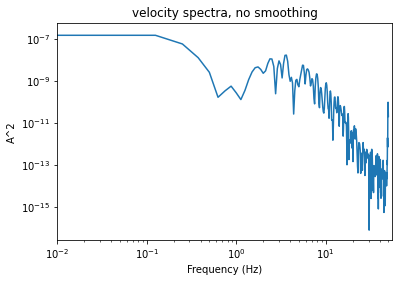

In [241]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(Pfreq,Pxx[0:Pnf])
ax.set_xlabel('Frequency (Hz)');
ax.set_ylabel('A^2');
ax.set_title('velocity spectra, no smoothing');
ax.set_xlim(dt, 55)

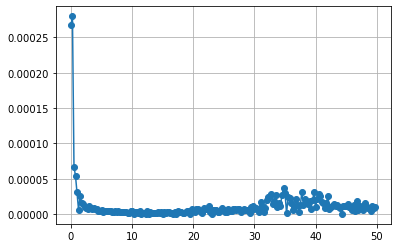

In [242]:
#%matplotlib widget 
# Number of sample points
N = 400
# sample spacing
T = 1/sr

x = np.linspace(0.0, N*T, N, endpoint=False)
y = s.data#[start:end+1000]

yf = rfft(y) #instead of fft as data type of y is real
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), marker='o') #what does this 2/N do???
plt.grid()
plt.show()

In [243]:
%%script false --no-raise-error
from earthquake import earthquake
c = cat_with_data.copy()
c.clear()
c.extend([cat_with_data[0]])
eq = earthquake(eq_name, c, data, picks, sensor_types = [])
eq.calc_Tpmax()
eq.calc_Tc()
print(eq._cached_params["tau_p_max"])
print(eq._cached_params["tau_c"])

## on displacement

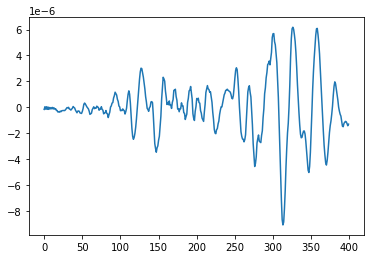

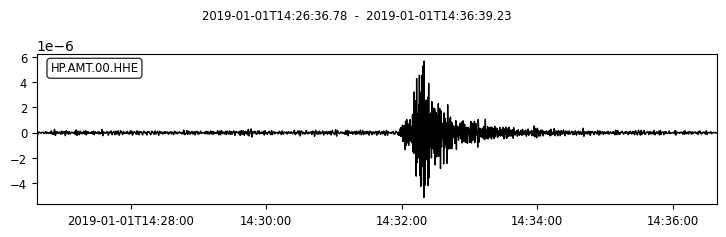

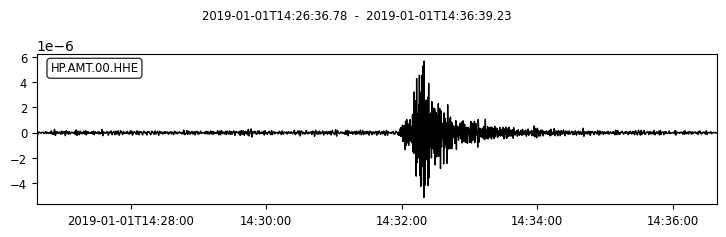

In [250]:
with open(root+eq_name+'/picks.pkl', 'rb') as f:
    picks = pickle.load(f)
sr = data[tr_no].stats.sampling_rate
tr_name = data[tr_no].stats.network+'.'+data[tr_no].stats.station+'.'+data[tr_no].stats.location
pick = UTCDateTime(picks[tr_name])
start = int((pick - data[tr_no].stats.starttime)*sr)
end = int(start + 4 * sr)
d = data[tr_no].copy()#.filter('lowpass', freq=10)
d.filter('highpass', freq=0.5)
plt.plot(d.data[start:end])
d.integrate()
d.plot()

detrend

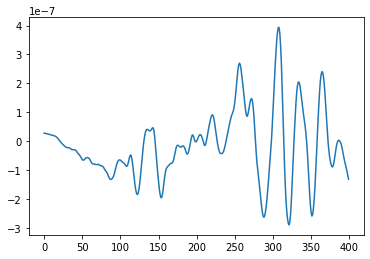

In [251]:
coda = d[start:end]
# obspy detrend d.detrend()
plt.plot(coda)

taper and pad with zeros

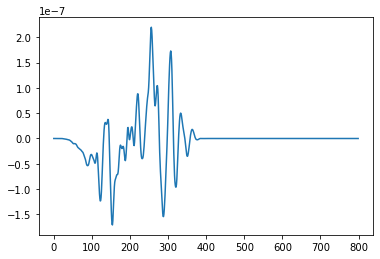

In [252]:
nx      = len(coda)
hann    = np.hanning(nx) #Is this the right sort of filter?
nx2     = 2*nx
x       = np.zeros(nx2)

x[0:nx] = coda*hann
plt.plot(x)

smooth

In [253]:
s.stats

         network: HP
         station: AMT
        location: 00
         channel: HHE
       starttime: 2019-01-01T14:26:36.780000Z
         endtime: 2019-01-01T14:36:39.230000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 60246
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 142, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 72704})
      processing: ["ObsPy 1.2.2: remove_response(fig=None::inventory=<obspy.core.inventory.inventory.Inventory object at 0x7ff47393f940>::output='VEL'::plot=False::pre_filt=None::taper=True::taper_fraction=0.05::water_level=60::zero_mean=True)"]

(0.01, 55)

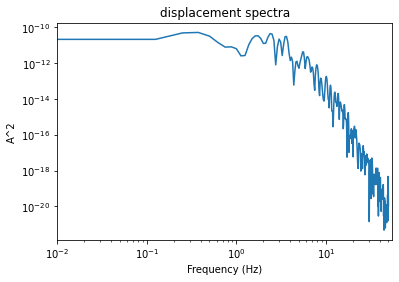

In [256]:
ft_x  = scipy.fft.fft(x,nx2)
Pxx   = abs(ft_x)**2
dt = s.stats.delta

Pfreq  = scipy.fft.rfftfreq(nx2,dt)#getting the frequencies to plot on the xaxis 
Pnf    = len(Pfreq)

nsmooth = 30
Pxx_smooth = np.convolve(Pxx, np.ones(nsmooth)/nsmooth)
#Because of the variance of spectral estimates, smoothing is necesary. We do this using a running window convolution. 
#It is a rough way to do it, you can choose better ways.


fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(Pfreq,Pxx[0:Pnf])
ax.set_xlabel('Frequency (Hz)');
ax.set_ylabel('A^2');
ax.set_title('displacement spectra');
ax.set_xlim(dt, 55)

multitaper from alice

[  1.00000000e+00   9.99999999e-01   9.99999928e-01   9.99997753e-01
   9.99951630e-01   9.99245086e-01   9.91403301e-01   9.32795159e-01
   6.95385151e-01   3.03032290e-01   6.79511833e-02   9.23508800e-03
   9.23506628e-04   7.45644122e-05   5.05138856e-06   2.93173639e-07
   1.47882849e-08   6.55557136e-10   2.57709749e-11   9.05299490e-13]
(512,)


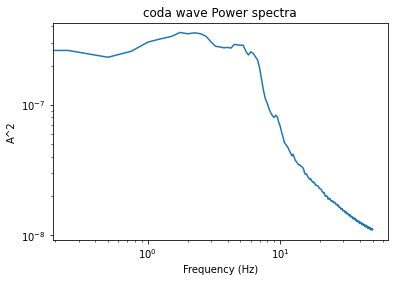

In [258]:
%matplotlib inline 
from spectrum import *
from pylab import *

#creating the frequencies to plot on x axis 
Pfreq  = scipy.fft.rfftfreq(len(coda),dt)

#doing the multitaper to get the spectra 
N = len(coda)
NW=4.5
k=20
[tapers, eigen] = dpss(N, NW, k)
print(eigen)
Sk_complex, weights, eigenvalues=pmtm(coda, e=eigen, v=tapers, show=False)
Sk = abs(Sk_complex)
Sk = np.mean(Sk,axis =0)
Sk_sdv = np.std(Sk,axis =0)


#plotting the spectra in loglog
plt.loglog(Pfreq[:-1],Sk[0:N//2])
#plt.fill_between(Pfreq[:-1],(Sk+Sk_sdv)[0:N//2],(Sk-Sk_sdv)[0:N//2],alpha=0.2)
plt.xlabel('Frequency (Hz)');
plt.ylabel('A^2');
plt.title('coda wave Power spectra');

Pfreq_MHZ = Pfreq
Sk_MHZ = Sk 

print(Sk_MHZ.shape)
plt.show()